In [1]:
import pandas as pd

In [3]:
# Load the dataset
df = pd.read_csv('Fake.csv')  # You can rename it if needed
df = df[['title', 'text']]  # Keep only title and text
df['label'] = 1  # Fake news = 1

real_df = pd.read_csv('True.csv')
real_df = real_df[['title', 'text']]
real_df['label'] = 0  # Real news = 0

# Combine both
data = pd.concat([df, real_df], axis=0).sample(frac=1).reset_index(drop=True)
data.head()

,title,text,label
0,WAS MURDERED 27 YEAR OLD DEMOCRAT Operative Ab...,Seth Rich was hired by the Democrat Party as t...,1
1,Trump Completely COLLAPSING In Most Important...,The only state keeping the Republican Party vi...,1
2,Google is the Engine of Censorship,"21st Century Wire says Late last year, search ...",1
3,Trump Got $6 Million In Donations For Vets – ...,Remember when Republican front runner Donald T...,1
4,Buffalo Bills Coach Gives Donald Trump The We...,"Buffalo Bills coach Rex Ryan has one job, to i...",1


In [4]:
# Drop missing values
data.dropna(inplace=True)

# Combine title + text
data['content'] = data['title'] + " " + data['text']

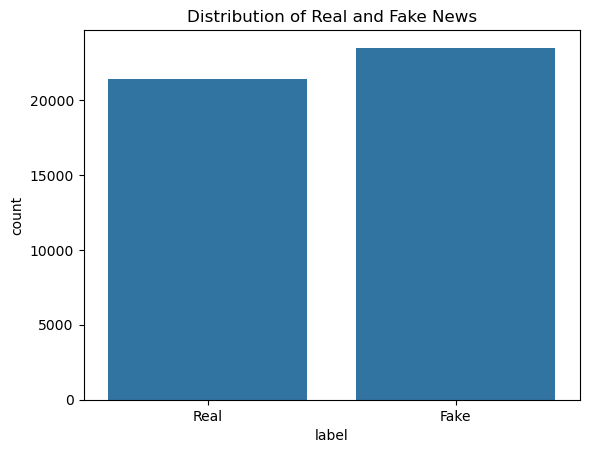

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot
sns.countplot(x='label', data=data)
plt.xticks([0, 1], ['Real', 'Fake'])
plt.title("Distribution of Real and Fake News")
plt.show()

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(data['content'])
y = data['label']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9863028953229399
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4226
           1       0.99      0.99      0.99      4754

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



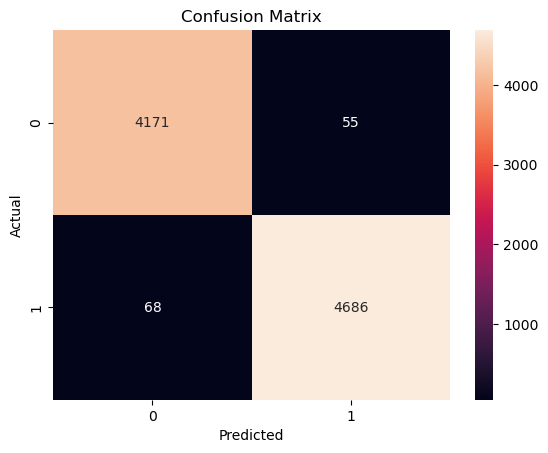

In [9]:
sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

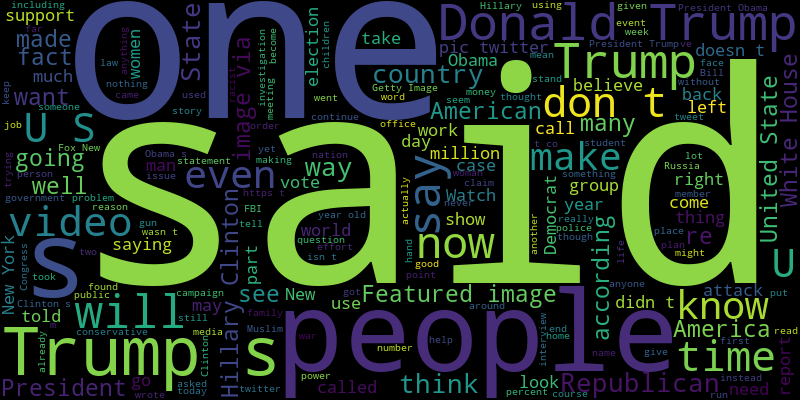

In [11]:
from wordcloud import WordCloud

fake_text = " ".join(data[data.label==1]['content'])
real_text = " ".join(data[data.label==0]['content'])

# Fake news wordcloud
WordCloud(width=800, height=400).generate(fake_text).to_image()

In [13]:
import streamlit as st
st.title("Fake News Detector")
text = st.text_area("Enter news text:")
if st.button("Check"):
    pred = model.predict(vectorizer.transform([text]))
    st.write("Prediction:", "Fake" if pred[0] == 1 else "Real")

2025-05-31 07:48:38.158 
  command:

    streamlit run C:\Users\roman\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-31 07:48:38.175 Session state does not function when running a script without `streamlit run`


In [14]:
from textblob import TextBlob
data['sentiment'] = data['content'].apply(lambda x: TextBlob(x).sentiment.polarity)